# PD Models using Stat Features and Models Predictions
# REPLACE DESCRIPTION!
This notebook covers all the process of definition preprocessing, training and evaluation for 3 tremor inference models. The proposed models are: SVM, KNN and Gradient Boost classifier.

All the models aim to classify if a person appears to have tremor (1) or not (0) during a 6 meters walk.

This model will use statistical descriptive data from the walk as features for model training.

## Requiered Imports

In [1]:
import os
import pickle

import pandas as pd

from src.settings import ROOT_DIR
from src.model.standard_models_builder import build_models_general_classifier
from src.evaluation.model_metrics_report import print_sklearn_model_metrics

## Load Data

In [2]:
train_data_path = ROOT_DIR / 'data' / 'processed' / 'summarizer-features' / 'train.pkl'
val_data_path = ROOT_DIR / 'data' / 'processed' / 'summarizer-features' / 'val.pkl'

with open(train_data_path, 'rb') as file:
    train_data = pickle.load(file)

with open(val_data_path, 'rb') as file:
    val_data = pickle.load(file)

In [3]:
len(train_data)

14812

In [4]:
features = train_data.columns.tolist()
target = features.pop(-1)

X_train, y_train = train_data[features], train_data[target]
X_val, y_val = val_data[features], val_data[target]

In [5]:
y_train = y_train.astype('int')
y_val = y_val.astype('int')

## Models
Define and train the models using GridSearch

In [6]:
dt, rf = build_models_general_classifier(X_train, y_train)

Started Grid Search - Model: Decision Tree Classifier
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best parameters Decision Tree Classifier: {'criterion': 'entropy', 'max_depth': 8}
Finished Grid Search - Model: Decision Tree Classifier
Started Grid Search - Model: Random Forest Classifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters Random Forest Classifier: {'n_estimators': 200}
Finished Grid Search - Model: Random Forest
Started Grid Search - Model: KNN
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters KNN: {'n_neighbors': 3, 'weights': 'uniform'}
Finished Grid Search - Model: KNN


C:\Users\julia\.conda\envs\AIForIMUParkinsonData\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


## Train Metrics

Accuracy: 0.97117202268431
0.9422541346748221
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7101
           1       0.97      0.97      0.97      7711

    accuracy                           0.97     14812
   macro avg       0.97      0.97      0.97     14812
weighted avg       0.97      0.97      0.97     14812

AUC-ROC: 0.9711926739611254
AUC-PR: 0.979898837575583


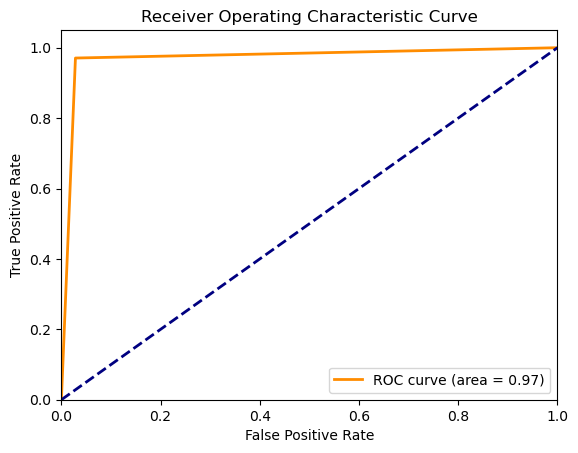

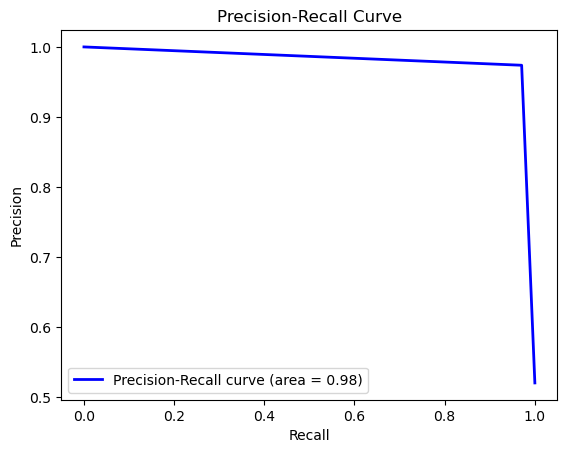

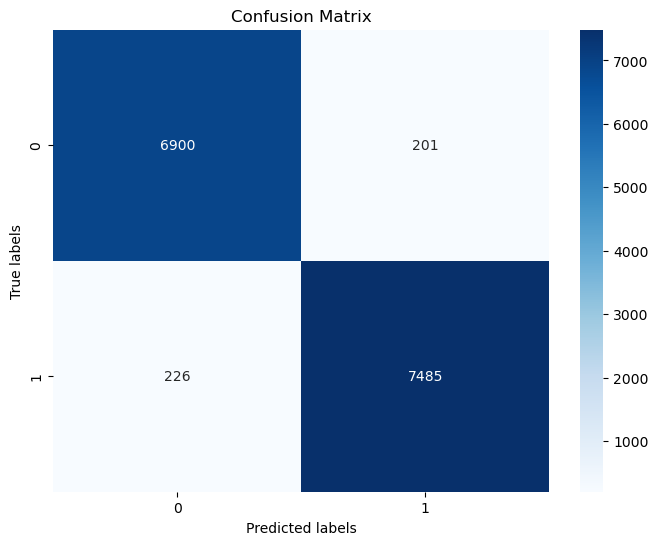

In [7]:
print_sklearn_model_metrics(dt, X_train, y_train.to_numpy())

Accuracy: 1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7101
           1       1.00      1.00      1.00      7711

    accuracy                           1.00     14812
   macro avg       1.00      1.00      1.00     14812
weighted avg       1.00      1.00      1.00     14812

AUC-ROC: 1.0
AUC-PR: 1.0


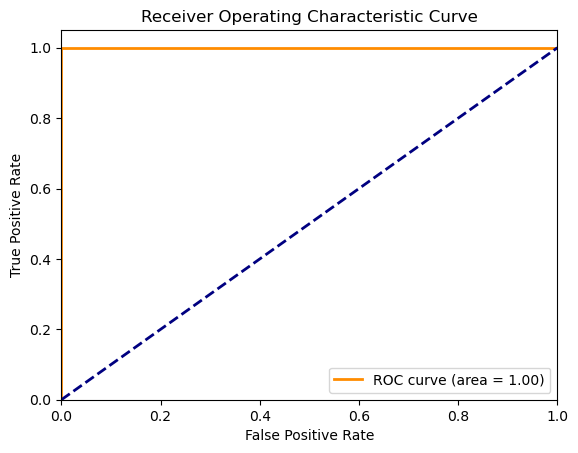

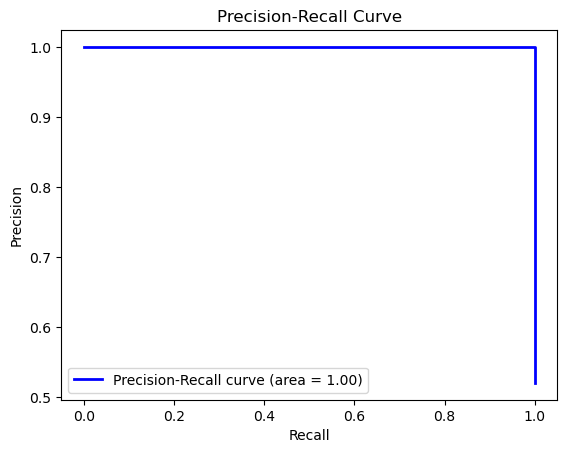

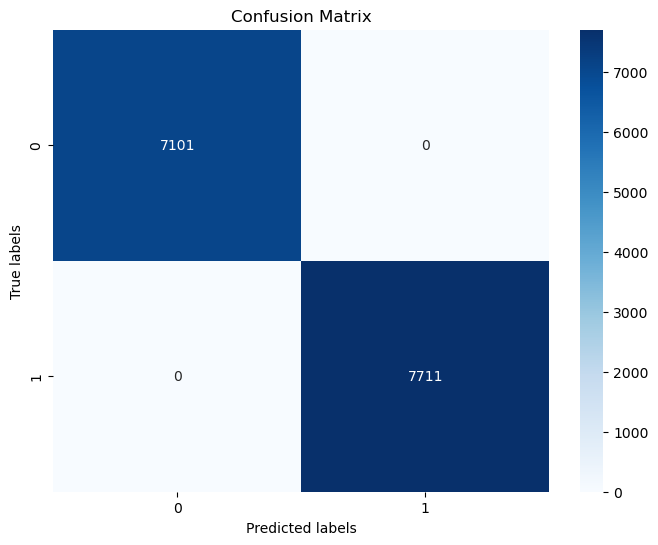

In [8]:
print_sklearn_model_metrics(rf, X_train, y_train)

## Val Metrics

Accuracy: 0.9554355165428764
0.9107494069500524
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1432
           1       0.95      0.96      0.96      1530

    accuracy                           0.96      2962
   macro avg       0.96      0.96      0.96      2962
weighted avg       0.96      0.96      0.96      2962

AUC-ROC: 0.9552524920582759
AUC-PR: 0.9671741450556005


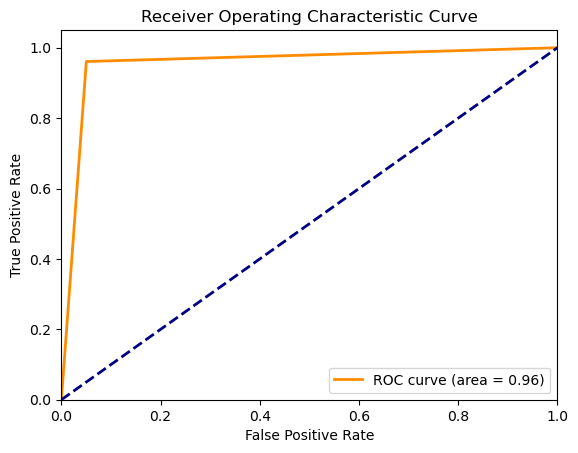

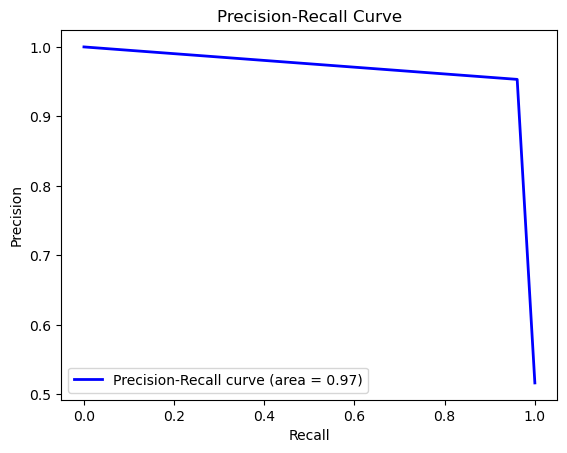

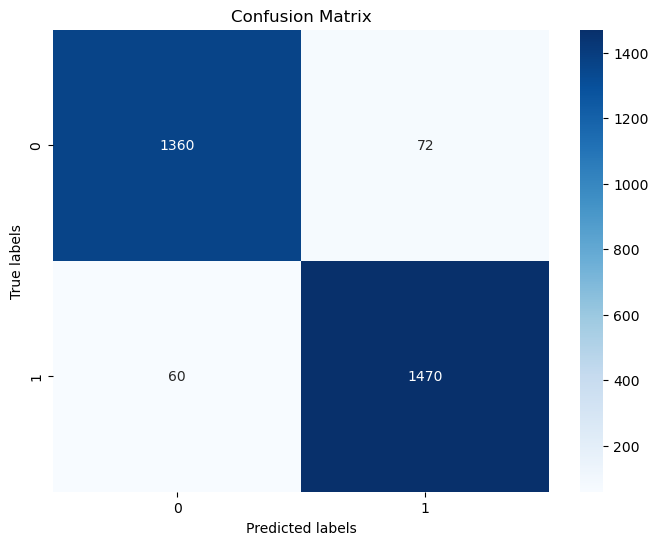

In [15]:
print_sklearn_model_metrics(dt, X_val, y_val)

Accuracy: 0.9770425388251182
0.9540265355834651
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1432
           1       0.98      0.98      0.98      1530

    accuracy                           0.98      2962
   macro avg       0.98      0.98      0.98      2962
weighted avg       0.98      0.98      0.98      2962

AUC-ROC: 0.9769279220067916
AUC-PR: 0.9829065181669394


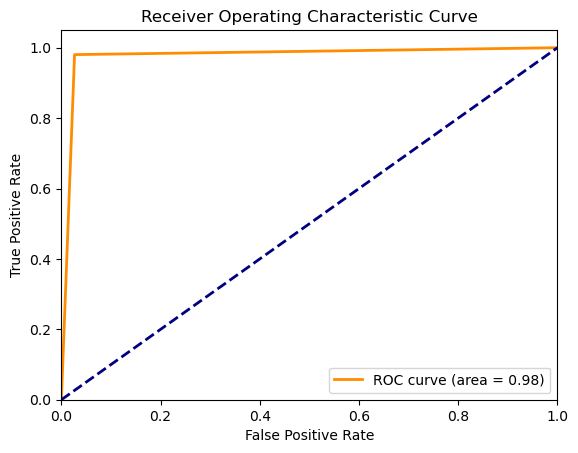

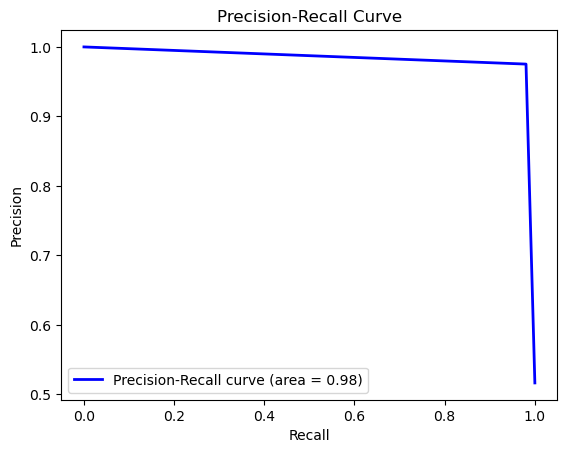

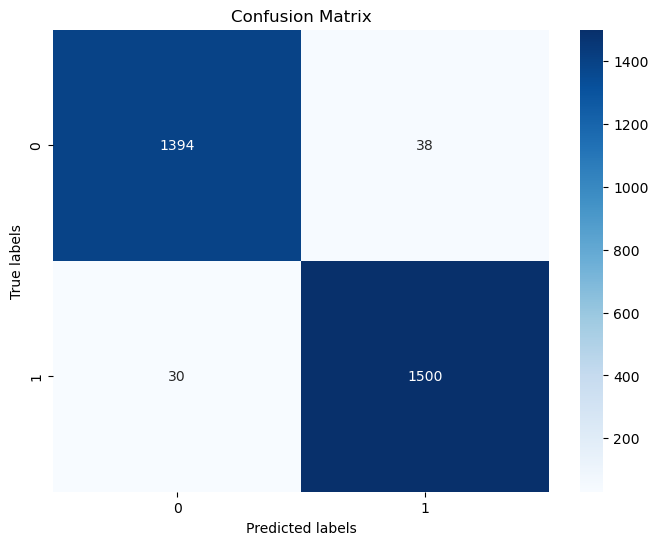

In [16]:
print_sklearn_model_metrics(rf, X_val, y_val)

## Save models

In [17]:
save_path = str(ROOT_DIR) + '/results/models/summarizer-features/'

os.makedirs(save_path, exist_ok=True)

with open(save_path + 'model.dt.pkl', 'wb') as file:
    pickle.dump(dt, file)
    file.close()
    
with open(save_path + 'model.rf.pkl', 'wb') as file:
    pickle.dump(rf, file)
    file.close()